# **2015 Year Pizzas Sales Analysis**

### **Importing Necessory Libraries**

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

- Imports pandas, a powerful library for data manipulation and analysis, particularly with DataFrame objects.
- Imports numpy, a library used for numerical operations, particularly for handling arrays and mathematical functions.
- Imports matplotlib.pyplot, a module for creating static, animated, and interactive visualizations, including charts and graphs.
- Imports seaborn, a statistical data visualization library built on top of matplotlib for creating complex and informative plots.
- Imports the warnings module, which is used to control and filter warning messages.
- Suppresses all warning messages, preventing them from being displayed during code execution.

### **Data Exploration**

In [44]:
# Read the CSV files
df1 = pd.read_csv(r"Dataset/order_details.csv")
df2 = pd.read_csv(r"Dataset/orders.csv")
df3 = pd.read_csv(r"Dataset/pizza_types.csv", encoding='unicode_escape')
df4 = pd.read_csv(r"Dataset/pizzas.csv")

# Merge the dataframes
order_data = pd.merge(df1, df2, on='order_id')
pizza_data = pd.merge(df3, df4, on='pizza_type_id')
data = pd.merge(order_data, pizza_data, on='pizza_id')

# Display the merged data
data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00


1. **Reading CSV Files**: 
   - The code reads four CSV files (`order_details.csv`, `orders.csv`, `pizza_types.csv`, `pizzas.csv`) using `pandas.read_csv()`. The third file, `pizza_types.csv`, is read with `encoding='unicode_escape'` to handle any special characters.

2. **Merging DataFrames**: 
   - The `df1` and `df2` dataframes are merged on the `order_id` column to combine order details with the corresponding order information.
   - The `df3` and `df4` dataframes are merged on the `pizza_type_id` column to combine pizza type details with the corresponding pizza data.
   - The resulting `order_data` and `pizza_data` dataframes are merged on the `pizza_id` column to create a comprehensive dataset, `data`.

3. **Displaying the Data**: 
   - The first five rows of the merged `data` dataframe are displayed using `data.head()`, allowing for an overview of the combined dataset.

In [3]:
data.shape

(48620, 12)

- The shape of the merged `data` dataframe is **(48620, 12)**.
  - **48620**: Represents the number of rows, which indicates there are 48,620 records in the dataset.
  - **12**: Represents the number of columns, meaning the dataset contains 12 different attributes or features.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  size              48620 non-null  object 
 11  price             48620 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


- **Total Entries**: The dataset contains 48,620 entries, indexed from 0 to 48,619.
- **Columns**: There are 12 columns in total.
  
  **Column Details**:
  1. **`order_details_id`**: Integer (int64) - Unique identifier for each order detail.
  2. **`order_id`**: Integer (int64) - Identifier for each order.
  3. **`pizza_id`**: Object (string) - Unique identifier for each pizza.
  4. **`quantity`**: Integer (int64) - The quantity of pizzas ordered.
  5. **`date`**: Object (string) - The date of the order.
  6. **`time`**: Object (string) - The time of the order.
  7. **`pizza_type_id`**: Object (string) - Identifier for the type of pizza.
  8. **`name`**: Object (string) - The name of the pizza.
  9. **`category`**: Object (string) - The category of the pizza.
  10. **`ingredients`**: Object (string) - Ingredients used in the pizza.
  11. **`size`**: Object (string) - The size of the pizza.
  12. **`price`**: Float (float64) - The price of the pizza.

- **Non-Null Count**: All columns have 48,620 non-null entries, meaning there are no missing values in the dataset.
  
- **Data Types**:
  - **Integer**: 3 columns (`order_details_id`, `order_id`, `quantity`).
  - **String/Object**: 8 columns (`pizza_id`, `date`, `time`, `pizza_type_id`, `name`, `category`, `ingredients`, `size`).
  - **Float**: 1 column (`price`).

- **Memory Usage**: The dataframe occupies 4.5+ MB of memory, which is moderate for a dataset of this size.

In [5]:
data['order_details_id'].nunique()

48620

In [6]:
df = data.drop(columns=['order_details_id'], axis=1)

The `data` dataframe is modified by removing the `order_details_id` column, and the resulting DataFrame is stored in the variable `df`. This helps streamline the data by removing unnecessary or redundant columns.

In [7]:
df.shape

(48620, 11)

- **Shape of `df`**: The new dataframe `df` has a shape of **(48620, 11)**.
  - **48620**: The number of rows remains the same as in the original `data` dataframe, meaning there are still 48,620 records.
  - **11**: The number of columns has decreased from 12 to 11, as the `order_details_id` column has been dropped.

This indicates that the dataframe now contains 11 columns, with the removal of the `order_details_id` column.

In [8]:
df.head()

,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       48620 non-null  int64  
 1   pizza_id       48620 non-null  object 
 2   quantity       48620 non-null  int64  
 3   date           48620 non-null  object 
 4   time           48620 non-null  object 
 5   pizza_type_id  48620 non-null  object 
 6   name           48620 non-null  object 
 7   category       48620 non-null  object 
 8   ingredients    48620 non-null  object 
 9   size           48620 non-null  object 
 10  price          48620 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 4.1+ MB


### **Data Cleaning**

In [10]:
df.isnull().sum() #to check null values

order_id         0
pizza_id         0
quantity         0
date             0
time             0
pizza_type_id    0
name             0
category         0
ingredients      0
size             0
price            0
dtype: int64

- **No Missing Data**: The output shows that all columns in the `df` dataframe have a null count of `0`, meaning there are no missing values in any of the columns.
- This confirms that the dataset is complete with no missing values, which is beneficial for analysis and modeling without the need for data imputation or handling missing values.

In [11]:
df.duplicated().sum()

np.int64(0)

- **No Duplicates**: The output `np.int64(0)` indicates that there are no duplicate rows in the `df` dataframe.
- As the result is `0`, it confirms that there are no duplicate rows in the dataframe, making the data clean and ready for analysis.

### **Creating New Features**

In [12]:
df.rename(columns={'name':'Pizza_name'}, inplace=True)

The column `name` is now renamed to `Pizza_name`, making it more descriptive and aligned with the context of the data.

In [13]:
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Time'] = pd.DatetimeIndex(df['time']).hour

 - Two new columns, `Month` and `Time`, are added to the dataframe. The `Month` column represents the month of the order, and the `Time` column represents the hour when the order was placed.

In [14]:
df.head()

,order_id,pizza_id,quantity,date,time,pizza_type_id,Pizza_name,category,ingredients,size,price,Month,Time
0,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,1,11
1,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,1,11
2,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,1,11
3,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,1,11
4,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,1,11


In [16]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [17]:
df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Api', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

The `Month` column now contains the month names (e.g., `'Jan'`, `'Feb'`, etc.) instead of numeric values, making the data more readable and easier to interpret.

In [18]:
df['Time'].unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 10,  9],
      dtype=int32)

In [19]:
# Categorizing the time into meaningful ranges
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the categorization to the Time column
df['time_category'] = df['Time'].apply(categorize_time)

- The `time_category` column contains labels such as "Morning", "Afternoon", "Evening", or "Night", making it easier to analyze and group the data based on these time periods.

In [20]:
df['Total_Price'] = df['quantity'] * df['price']

The dataframe now contains a `Total_Price` column that reflects the total cost for each pizza order, which can be useful for further analysis like total revenue or profit calculation.

### **Unique Values In The Each Columns**

In [21]:
for col in df.columns:
    print(f"{col.rjust(14)}: {df[col].nunique()}")

      order_id: 21350
      pizza_id: 91
      quantity: 4
          date: 358
          time: 16382
 pizza_type_id: 32
    Pizza_name: 32
      category: 4
   ingredients: 32
          size: 5
         price: 25
         Month: 12
          Time: 15
 time_category: 4
   Total_Price: 56


The provided data appears to represent an individual pizza order with the following information:
1. **Order Details**:
   - **order_id**: 21350 — Unique identifier for the order.
   - **pizza_id**: 91 — Identifier for the pizza type ordered.
   - **quantity**: 4 — Number of pizzas ordered.
   - **price**: 25 — Price per pizza.

2. **Date and Time**:
   - **Month**: 12 — December, extracted from the `date`.
   - **Time**: 15 — 3 PM, extracted from the `time` column.

3. **Categorization**:
   - **pizza_type_id**: 32 — Identifier for the type of pizza.
   - **Pizza_name**: 32 — Likely a placeholder for the pizza name, needs further clarification.
   - **category**: 4 — Represents the category of pizza, probably related to its type.
   - **ingredients**: 32 — Ingredients used for the pizza (likely a placeholder or encoded data).
   - **size**: 5 — The size of the pizza.
   - **time_category**: 4 — "Night" category, as categorized by the `Time` column, representing the time period when the order was placed.

This data provides an individual order's details, including the pizza's type, quantity, time, and price, and categorizes the order based on the time of day.

#### **Pizza Names in the Dataset**

In [22]:
df['Pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

This variety of pizzas provides a wide range of pizza types for analysis, allowing insights into customer preferences and sales trends for each specific pizza.

In [24]:
df['category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

Each of these categories represents a different pizza type ordered across various transactions, allowing for detailed analysis and insights based on the popularity or sales of each pizza type.

In [25]:
df['size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

The variety in sizes allows for analysis of trends in customer preferences based on pizza size, such as which size is most popular or most frequently ordered.

### **EDA**


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,48620.0,10701.479761,6180.119770,1.00,5337.00,10682.5,16100.00,21350.00
quantity,48620.0,1.019622,0.143077,1.00,1.00,1.0,1.00,4.00
price,48620.0,16.494132,3.621789,9.75,12.75,16.5,20.25,35.95
Time,48620.0,15.911806,3.149836,9.00,13.00,16.0,18.00,23.00
Total_Price,48620.0,16.821474,4.437398,9.75,12.75,16.5,20.50,83.00


- The **order_id** shows a wide range with a significant spread between the minimum and maximum values.
- The **quantity** column has a dominant value of 1, with very few occurrences of higher quantities.
- **Price** values range from 9.75 to 35.95, with most pizzas priced around 12.75 to 20.25.
- The **Time** column indicates the distribution of pizza orders throughout the day, with a slight concentration in the afternoon (from 12 PM to 6 PM).
- The **Total_Price** values are closely aligned with the **price** and **quantity** values, reflecting the overall price for each pizza order.

In [27]:
df.describe(exclude=['int', 'float']).T

,count,unique,top,freq
pizza_id,48620,91,big_meat_s,1811
date,48620,358,2015-11-26,261
time,48620,16382,12:32:00,26
pizza_type_id,48620,32,classic_dlx,2416
Pizza_name,48620,32,The Classic Deluxe Pizza,2416
category,48620,4,Classic,14579
ingredients,48620,32,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2416
size,48620,5,L,18526
Month,48620,12,Jul,4301
time_category,48620,4,Afternoon,23622


- **Pizza_name** and **pizza_type_id** have the most frequent pizza type as `The Classic Deluxe Pizza` and `classic_dlx`, both having 2,416 occurrences.
- The most common **category** of pizzas is `Classic`, which appears 14,579 times in the dataset.
- The **size** of pizza that is most frequently ordered is `L` (Large), which occurs 18,526 times.
- **Month** distribution shows that `July` (Jul) has the highest frequency, with 4,301 orders recorded.
- **Time_category** shows that the majority of orders fall under `Afternoon`, with a frequency of 23,622.

#### **Univeriate Analysis**

In [28]:
num_col = df.select_dtypes(include=['int', 'float']).drop(columns=['order_id'], errors='ignore').columns.tolist()
cat_col = df.select_dtypes(exclude=['int', 'float']).drop(columns=['date', 'time', 'ingredients'], errors='ignore').columns.tolist()
print(num_col)
print(cat_col)

['quantity', 'price', 'Time', 'Total_Price']
['pizza_id', 'pizza_type_id', 'Pizza_name', 'category', 'size', 'Month', 'time_category']


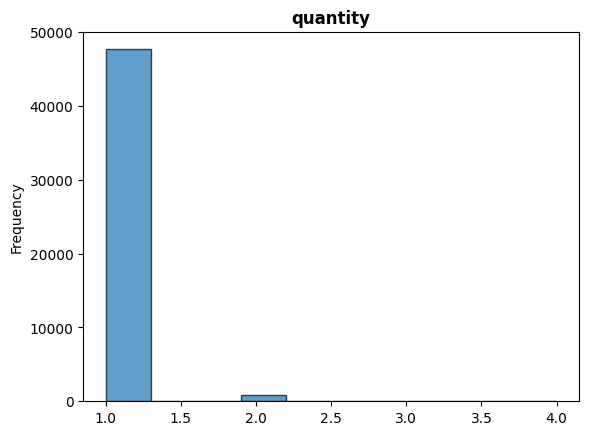

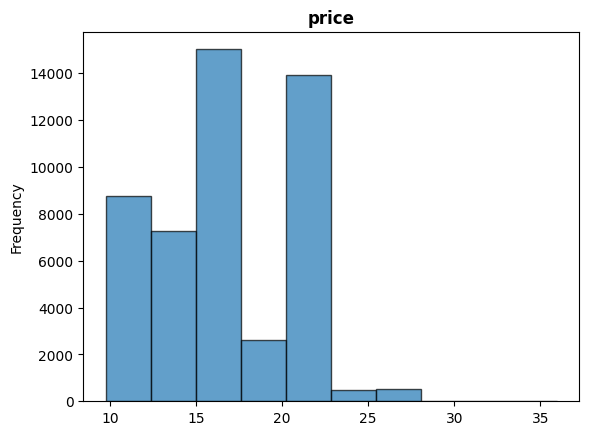

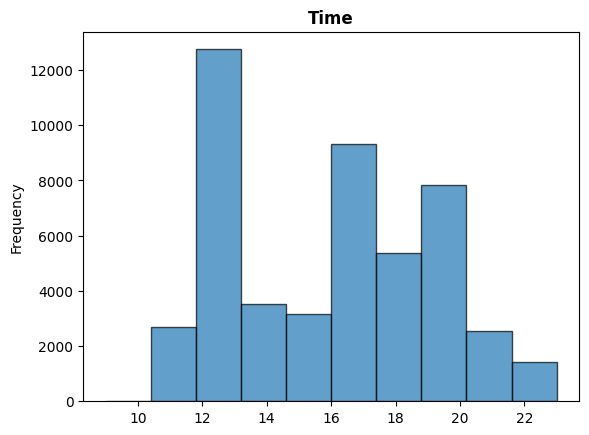

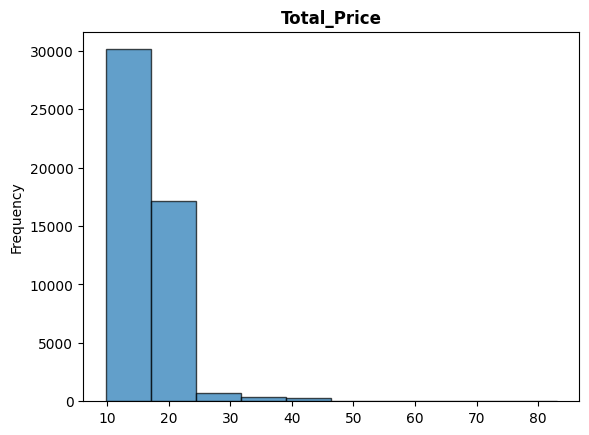

In [29]:
for col in num_col:
    
    plt.figure()
    plt.hist(df[col], bins=10, alpha=0.7, edgecolor='black')
    plt.ylabel('Frequency')
    plt.title(col, fontsize=12, fontweight='bold', color='black')

    plt.show()

- Most orders consist of a single pizza (quantity = 1), with very few orders of higher quantities (e.g., 2, 3, or 4 pizzas). This indicates that the majority of customers typically order one pizza at a time.
- The price distribution shows peaks at values around 15, 16, and 20, suggesting that pizzas priced within these ranges are the most popular or frequently ordered. There is a noticeable decrease in orders for pizzas priced higher than 25.
- A significant peak in the time distribution occurs around 12:00 PM, indicating that many customers place orders during lunch hours. Other popular times are in the afternoon (around 14:00) and early evening (16:00-18:00), suggesting that customers order pizzas for lunch and dinner.

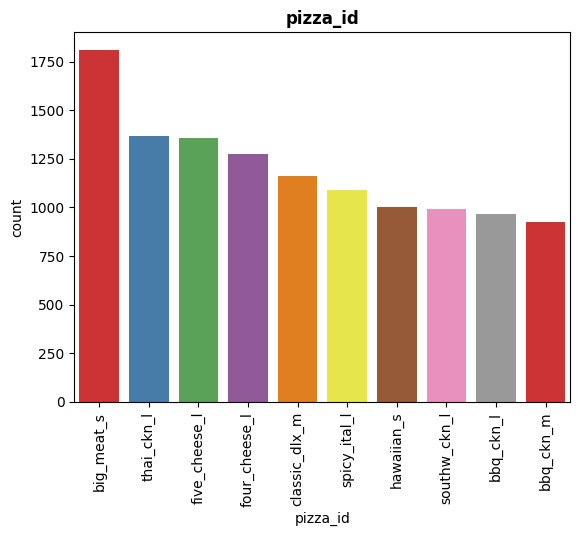

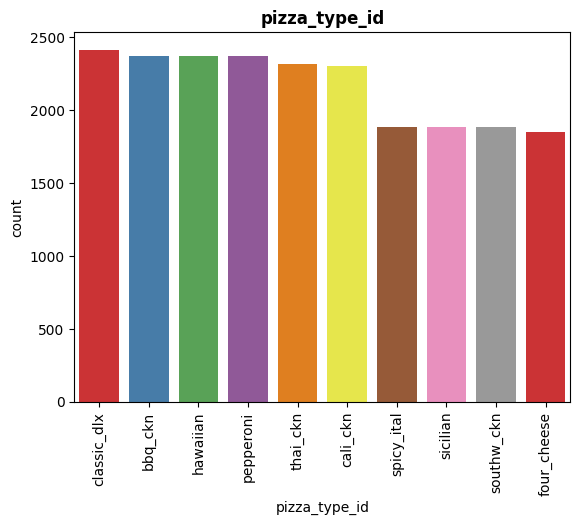

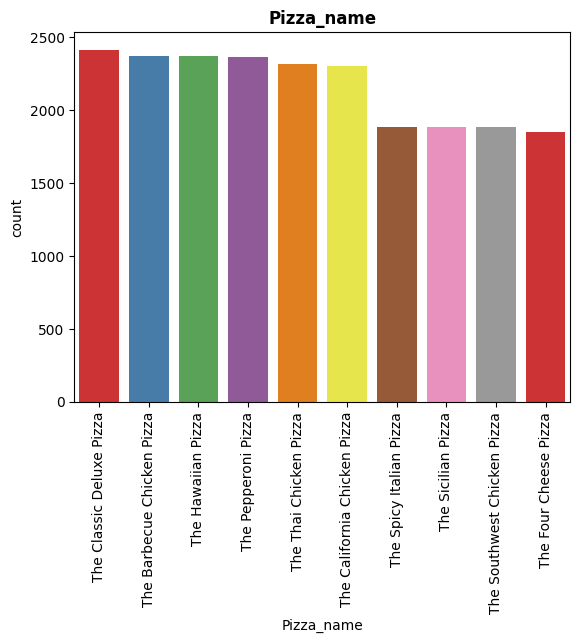

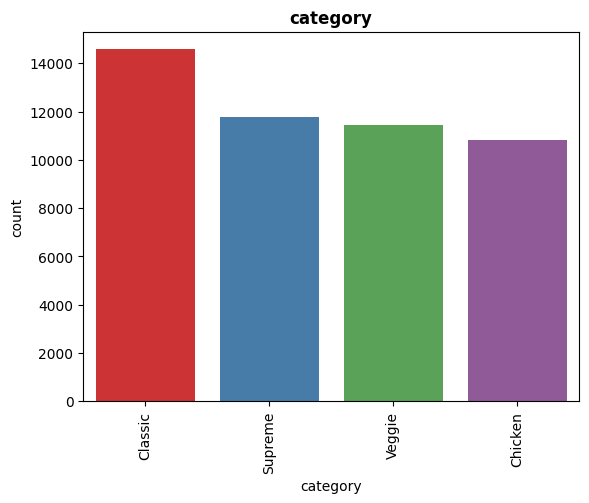

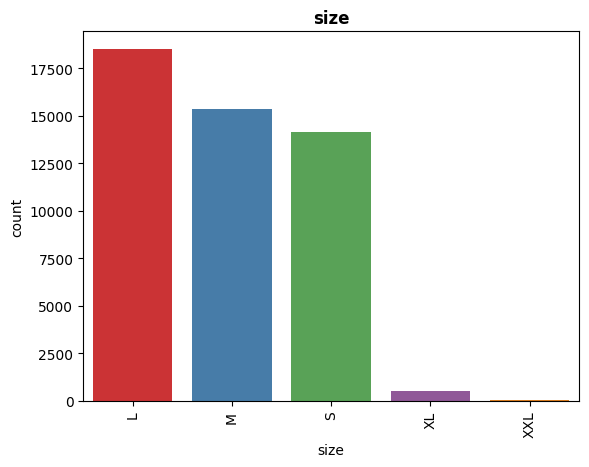

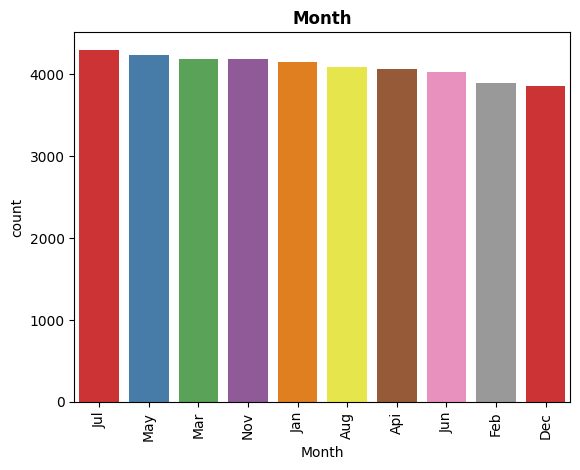

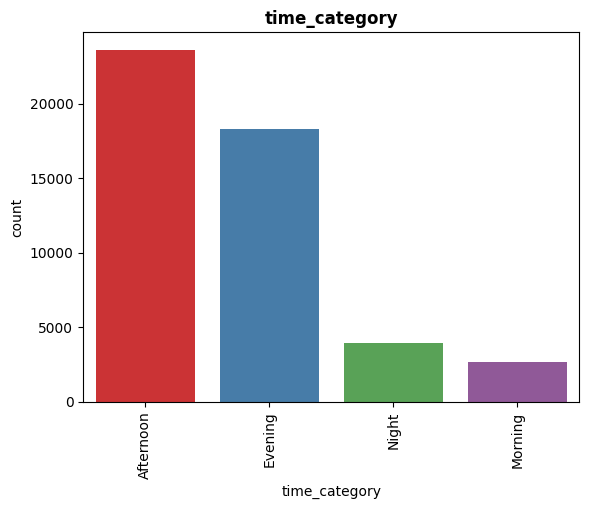

In [30]:
for col in cat_col:
    
    plt.figure()
    sns.countplot(x=col, data = df, order=df[col].value_counts().head(10).index, palette='Set1')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, fontweight='bold', color='black')
    plt.show()

- **Pizza_name** and **pizza_type_id** have the most frequent pizza type as `The Classic Deluxe Pizza` and `classic_dlx`, both having 2,416 occurrences.
- The most common **category** of pizzas is `Classic`, which appears 14,579 times in the dataset.
- The **size** of pizza that is most frequently ordered is `L` (Large), which occurs 18,526 times.
- **Month** distribution shows that `July` (Jul) has the highest frequency, with 4,301 orders recorded.
- **Time_category** shows that the majority of orders fall under `Afternoon`, with a frequency of 23,622.

### **Insights**

In [31]:
print(f"Net Sales: {df['price'].sum():.2f}")

Net Sales: 801944.70


### **Net Sales**

The **Net Sales** calculated from the dataset is **801,944.70**. 

This figure represents the total revenue generated from pizza sales in the dataset. The value is derived by summing up the **Total_Price** column, which is the product of quantity and price for each pizza order. The net sales can be used to evaluate the overall performance of the pizza business or analyze sales trends based on different variables such as pizza type, size, or time period.

In [32]:
print(f"Grass Sales: {df['Total_Price'].sum():.2f}")

Grass Sales: 817860.05


### **Gross Sales**

The **Gross Sales** calculated from the dataset is **817,860.05**.

Gross sales represent the total revenue from all pizza sales before deducting any discounts, returns, or other adjustments. This value is obtained by summing the **Total_Price** column, which reflects the total price for all pizza orders. It's a key figure to analyze the overall sales performance, though it doesn't account for any reductions or returns, unlike **Net Sales**.


#### **Prices of the Pizzas**

In [33]:
price_of_pizza = df.groupby('Pizza_name')['price'].max().sort_values().reset_index()
price_of_pizza

,Pizza_name,price
0,The Big Meat Pizza,12.00
1,The Pepperoni Pizza,15.25
2,The Hawaiian Pizza,16.50
3,"The Pepperoni, Mushroom, and Peppers Pizza",17.50
4,The Four Cheese Pizza,17.95
5,The Five Cheese Pizza,18.50
6,The Green Garden Pizza,20.25
7,The Calabrese Pizza,20.25
8,The Mexicana Pizza,20.25
9,The Spinach and Feta Pizza,20.25


These prices reflect the various pizza types available in the dataset, ranging from 12.00 to 35.95, showcasing a variety of premium and regular pizza options.

#### **Prices of the Pizza Sizes**

In [34]:
price_of_pizza = df.groupby('size')['price'].max().sort_values().reset_index()
price_of_pizza

,size,price
0,M,16.75
1,L,21.00
2,S,23.65
3,XL,25.50
4,XXL,35.95


These sizes reflect the pricing based on the different portions available for the pizzas, with larger sizes generally commanding a higher price.

#### **Prices of the Pizza Category**

In [35]:
price_of_pizza = df.groupby('category')['price'].max().sort_values().reset_index()
price_of_pizza

,category,price
0,Chicken,20.75
1,Veggie,21.00
2,Supreme,23.65
3,Classic,35.95


The prices vary based on the category of the pizza, with the "Classic" category being the most expensive.

In [36]:
qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']
for col in qua_col:
    quantity_analysis = df.groupby(col).agg({'Total_Price': 'sum'}).sort_values(by='Total_Price', ascending=False).reset_index()
    print(f"\nPrice_analysis of {col}")
    print(quantity_analysis)


Price_analysis of Pizza_name
                                    Pizza_name  Total_Price
0                       The Thai Chicken Pizza     43434.25
1                   The Barbecue Chicken Pizza     42768.00
2                 The California Chicken Pizza     41409.50
3                     The Classic Deluxe Pizza     38180.50
4                      The Spicy Italian Pizza     34831.25
5                  The Southwest Chicken Pizza     34705.75
6                    The Italian Supreme Pizza     33476.75
7                           The Hawaiian Pizza     32273.25
8                        The Four Cheese Pizza     32265.70
9                           The Sicilian Pizza     30940.50
10                         The Pepperoni Pizza     30161.75
11                             The Greek Pizza     28454.10
12                          The Mexicana Pizza     26780.75
13                       The Five Cheese Pizza     26066.50
14                     The Pepper Salami Pizza     25529.00
15        

### **Quantity Analysis**

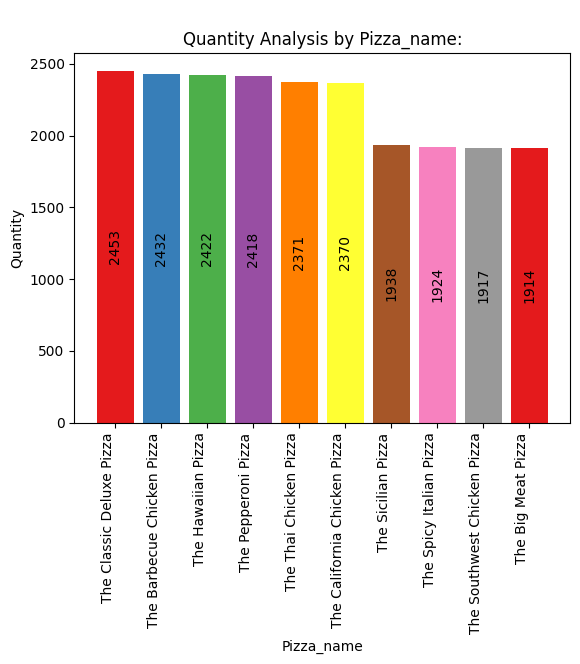

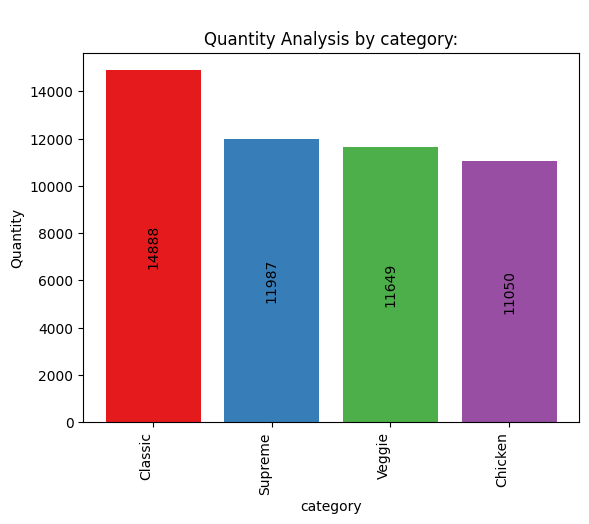

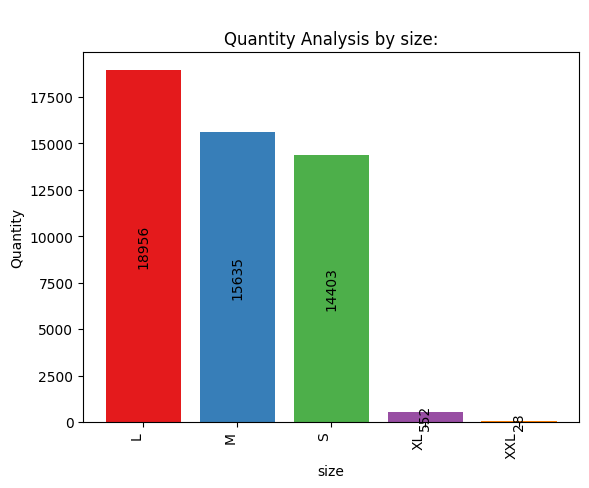

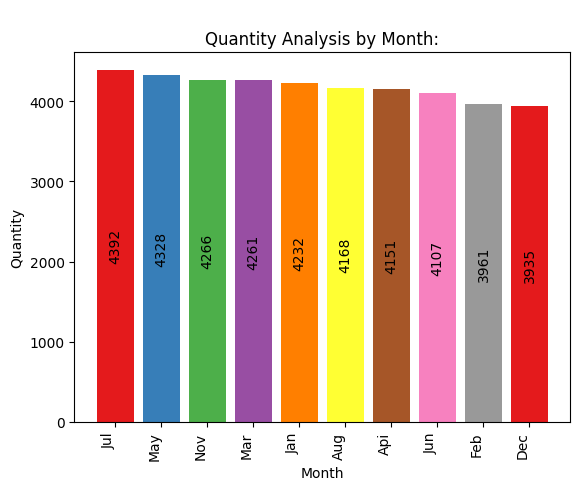

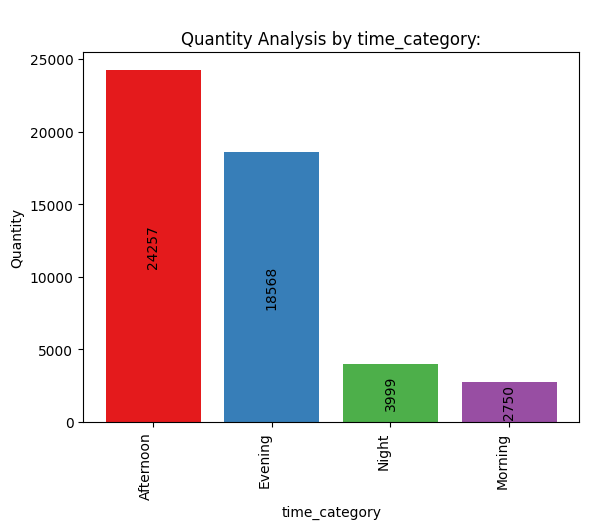

In [37]:
qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']

for col in qua_col:  
    analysis= df.groupby(col).agg({'quantity': 'sum'}).sort_values(by='quantity',ascending=False).reset_index().head(10)
    bar_value = plt.bar(analysis[col], analysis['quantity'], color=sns.color_palette('Set1'))
    plt.bar_label(bar_value, label_type='center', rotation=90)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel(col)
    plt.ylabel('Quantity')
    plt.title(f'\nQuantity Analysis by {col}:')
    plt.show()

### **Overall Insights**
- Afternoon is the peak time for pizza orders, with the highest total quantity.
- Size L is the most preferred pizza size, followed by Size M.
- The Classic Deluxe Pizza is the most popular pizza, with the highest number of orders.
- The Classic category leads in overall orders, followed by Supreme and Veggie categories.
-July is the busiest month for pizza orders, followed closely by May and November.

### **Price Analysis**

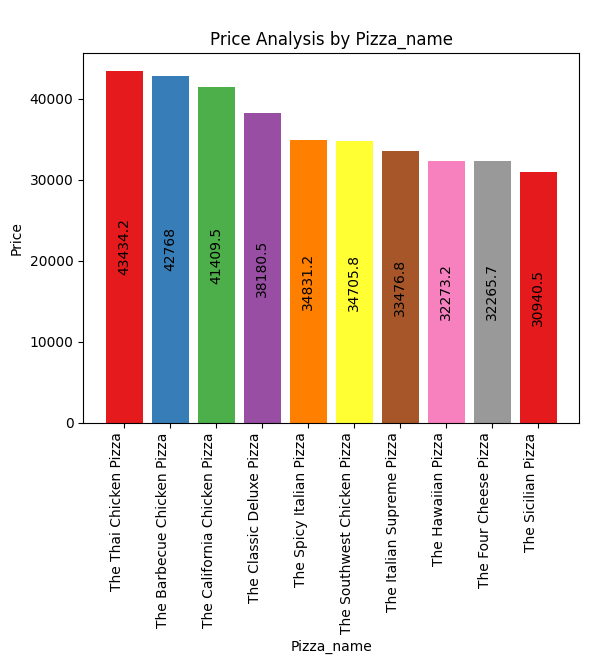

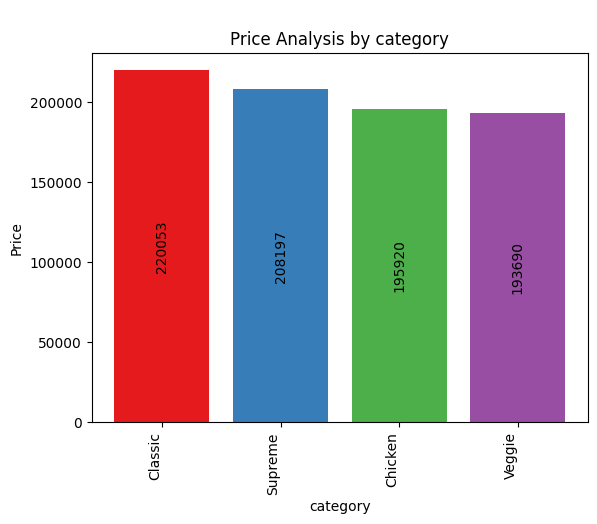

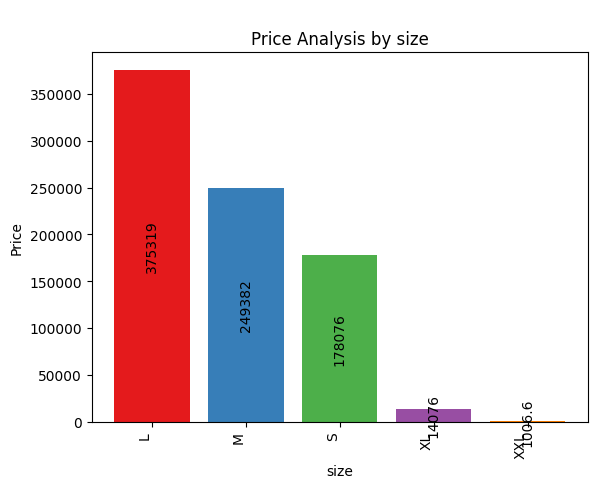

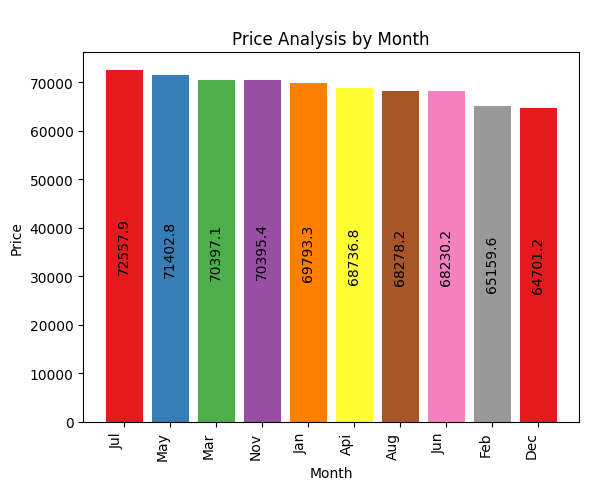

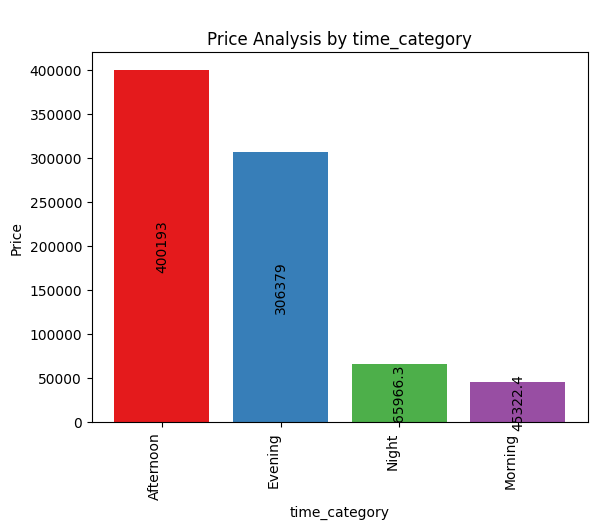

In [38]:
qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']

for col in qua_col:  
    analysis= df.groupby(col).agg({'Total_Price': 'sum'}).sort_values(by='Total_Price',ascending=False).reset_index().head(10)
    bar_value = plt.bar(analysis[col], analysis['Total_Price'], color=sns.color_palette('Set1'))
    plt.bar_label(bar_value, label_type='center', rotation=90)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'\nPrice Analysis by {col}')
    plt.show()

### **Overall Insights**
- **Afternoon** has the highest total sales.
- **Pizza Size**: Large (L) pizzas dominate in total sales.
- **Chicken-based** pizzas lead in sales, especially varieties like the **Thai Chicken Pizza** and **Barbecue Chicken Pizza**.
- **Classic** pizzas are the top-selling category, followed by **Supreme** pizzas.
- Sales are highest in **July** and **May**, with steady performance across other months.

### **Average Number of Ingredients by Category***

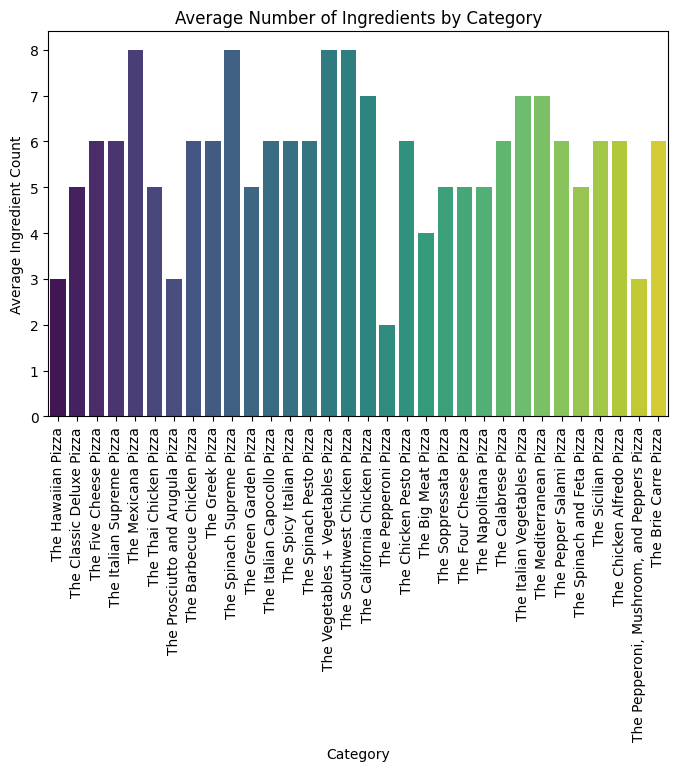

In [39]:
# Top ingredients analysis
df['ingredients_count'] = df['ingredients'].apply(lambda x: len(x.split(',')))
plt.figure(figsize=(8, 5))
sns.barplot(x='Pizza_name', y='ingredients_count', data=df, palette='viridis')
plt.title('Average Number of Ingredients by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Ingredient Count')
plt.show()

### **Analyzing Sales And Quantity on Perticular Month (or) Timings**

In [40]:
def quantity_analysis(df, filter_col=None, filter_value=None):

    # Apply filter if specified
    if filter_col and filter_value:
        filtered_df = df[df[filter_col] == filter_value]
    else:
        filtered_df = df

    qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']

    for col in qua_col:  
        analysis= df.groupby(col).agg({'quantity': 'sum'}).sort_values(by='quantity',ascending=False).reset_index().head(10)
        bar_value = plt.bar(analysis[col], analysis['quantity'], color=sns.color_palette('Set1'))
        plt.bar_label(bar_value, label_type='center', rotation=90)
        plt.xticks(rotation=90, ha='right')
        plt.xlabel(col)
        plt.ylabel('Quantity')
        plt.title(f'\nQuantity Analysis by {col}')
        plt.show()


In [41]:
def Sales_analysis(df, filter_col=None, filter_value=None):

    # Apply filter if specified
    if filter_col and filter_value:
        filtered_df = df[df[filter_col] == filter_value]
    else:
        filtered_df = df

    qua_col = ['Pizza_name', 'category', 'size', 'Month', 'time_category']

    for col in qua_col:  
        analysis= df.groupby(col).agg({'Total_Price': 'sum'}).sort_values(by='Total_Price',ascending=False).reset_index().head(10)
        bar_value = plt.bar(analysis[col], analysis['Total_Price'], color=sns.color_palette('Set1'))
        plt.bar_label(bar_value, label_type='center', rotation=90)
        plt.xticks(rotation=90, ha='right')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.title(f'\nPrice Analysis by {col}')
        plt.show()

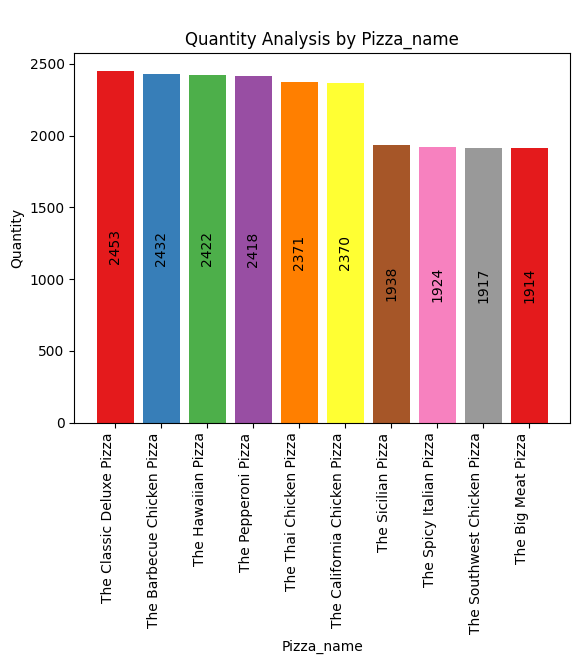

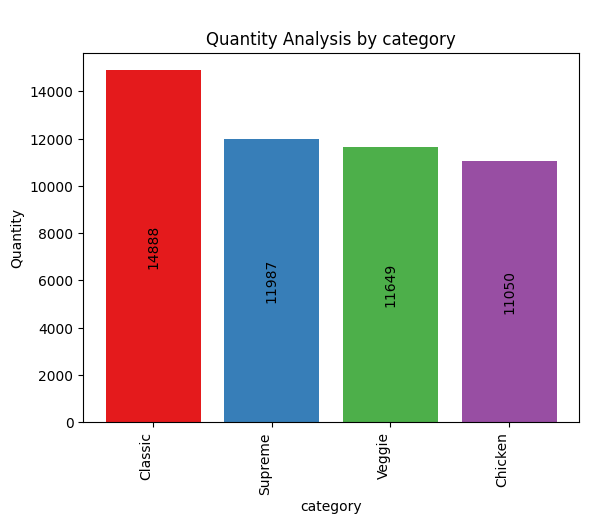

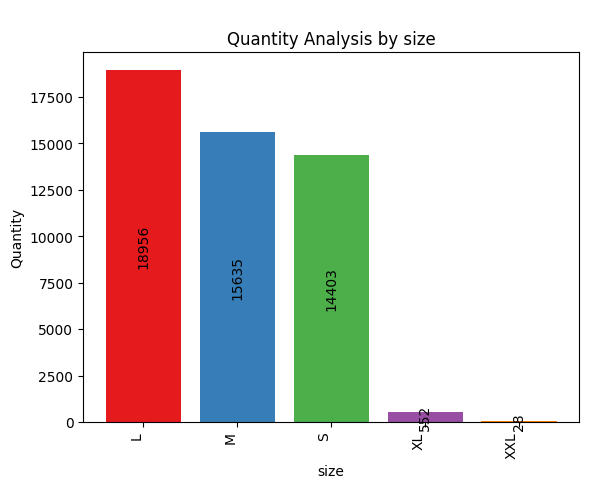

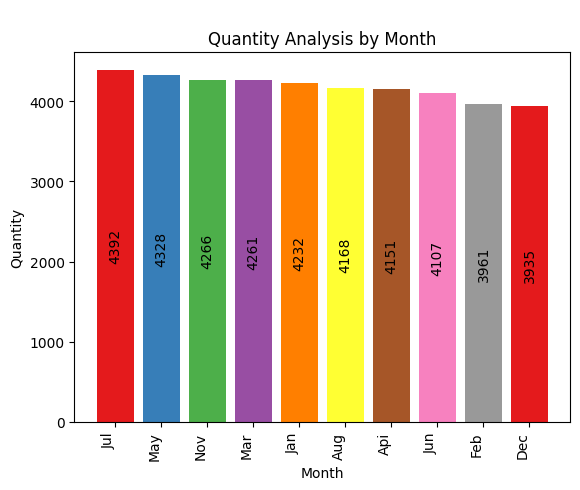

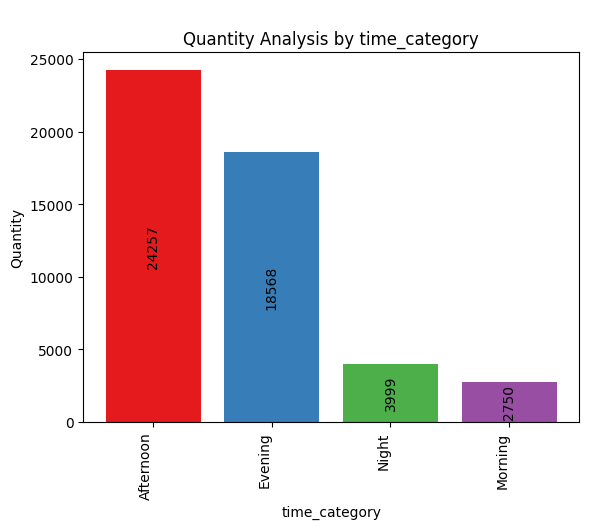

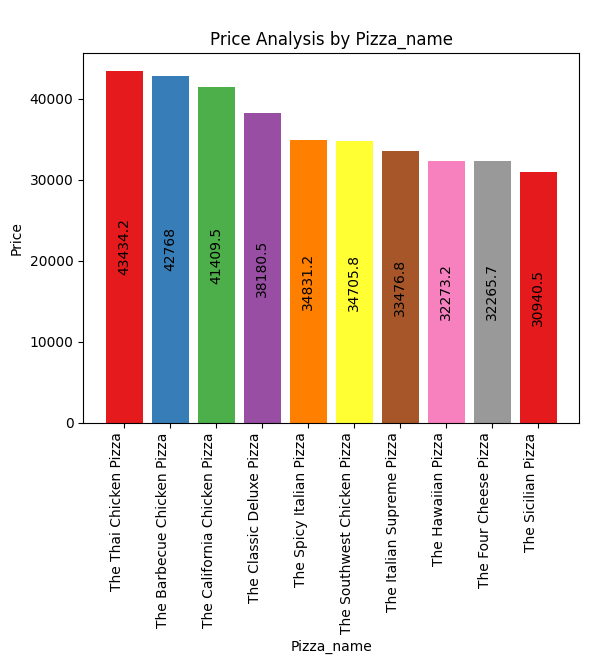

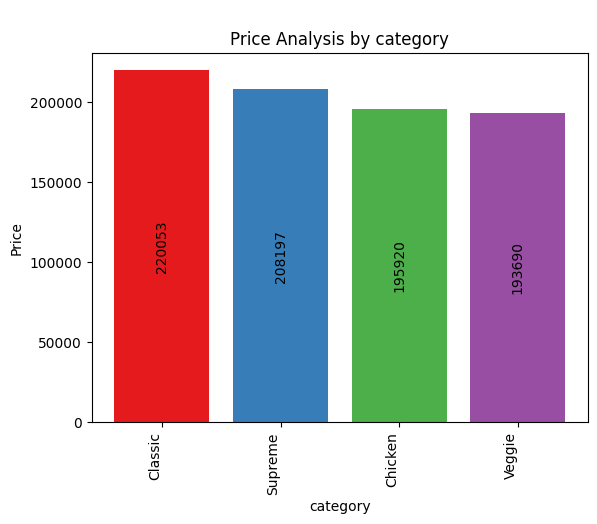

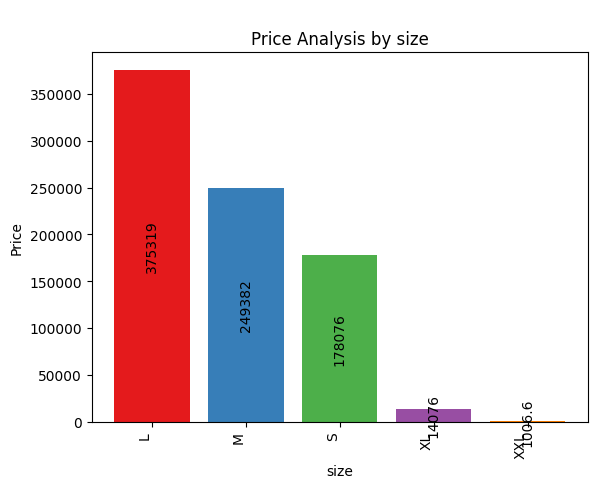

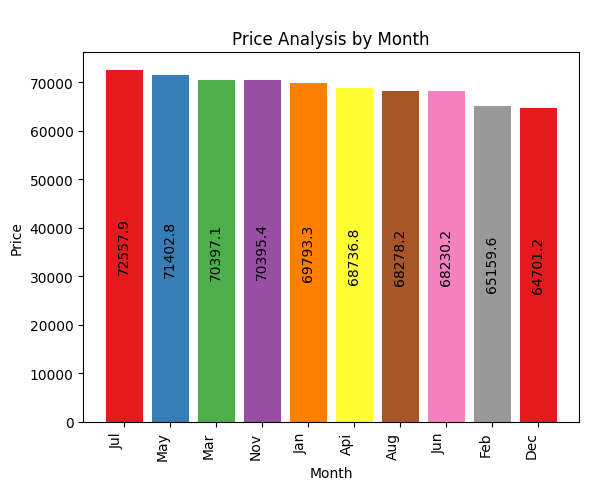

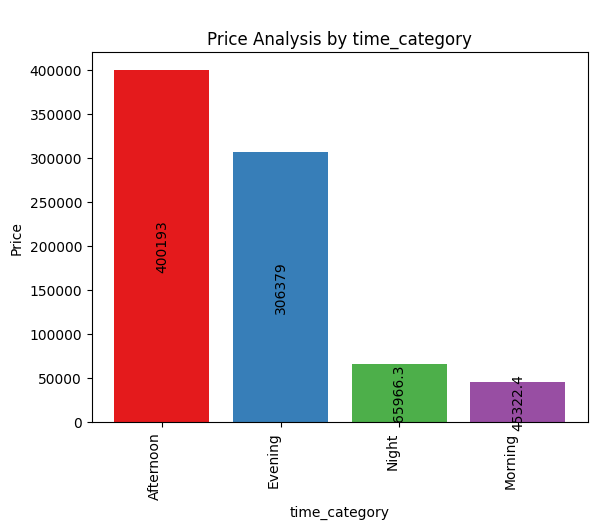

In [42]:
# Plot for specific month
quantity_analysis(df, filter_col='Month', filter_value='January')
Sales_analysis(df, filter_col='Month', filter_value='January')

They allow easy comparison of sales and quantities across different attributes, with the option to filter based on specific columns.

### **Conclusion**
The analysis of pizza sales data provides valuable insights into customer preferences and sales trends:

- Peak Ordering Time: The Afternoon emerges as the peak time for pizza orders, with the highest total quantity ordered during this period. This suggests that promotional efforts and marketing strategies targeted at afternoon customers may be highly effective.

- Pizza Size Preferences: Large (L) pizzas are the most preferred size, leading in both total quantity and sales. Medium (M) pizzas also show significant popularity, indicating a preference for larger portions among customers.

- Most Popular Pizza Types: Chicken-based pizzas such as the Thai Chicken Pizza and Barbecue Chicken Pizza are the top performers in terms of both sales and quantity. This highlights the growing demand for chicken-flavored options, which can be leveraged to target chicken-lovers more effectively.

- Top Categories: The Classic category leads in overall orders, followed by Supreme and Veggie categories. This indicates a strong customer preference for traditional pizza varieties, which could be prioritized in marketing and inventory planning.

- Sales Trends by Month: July stands out as the busiest month for pizza orders, with May and November closely following. This suggests that pizza sales peak during summer and early fall, which can help plan for higher stock and special promotions during these months.

Overall, these insights offer actionable data to improve business decisions related to inventory management, marketing strategies, and product offerings. Targeting popular pizza types, sizes, and times, along with focusing on peak months, can help optimize sales and customer satisfaction.